In [57]:
%autosave 60
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns




Autosaving every 60 seconds


### The data has the following two files:
 
A user file ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:
name: the user's name
object_id: the user's id
email: email address
email_domain: domain of email address, e.g. gmail.com
creation_source: how they signed up for the product. This takes on one of 5 values:
PERSONAL_PROJECTS: invited to join another user's personal workspace
GUEST_INVITE: invited to an organization as a guest (limited permissions)
ORG_INVITE: invited to an organization (as a full member)
SIGNUP: signed up via asana.com
SIGNUP_GOOGLE_AUTH: signed up using Google
Authentication (using a Google email account for their login id)
creation_time: when they created their account
last_session_creation_time: unix timestamp of last login
opted_in_to_mailing_list: whether they have opted into receiving marketing emails
enabled_for_marketing_drip: whether they are on the regular marketing email drip
org_id: the organization (group of users) they belong to
invited_by_user_id: which user invited them to join (if applicable).
 
A usage summary file ("takehome_user_engagement") that has a row for each day that a user logged into the product.
 
We define an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period. Because we believe that adopted users are more likely to be successful at using Asana in the long term than those that are not adopted, we want to know what things are likely indicators of future adoption. With this in mind, we'd like you to identify which factors predict user adoption.
 
We suggest spending ~3 hours on this, but you're welcome to spend more or less. Please send us a brief report with your findings, along with any summary tables or graphs that you think will help us better understand them. We will not consider more than 1 page of text and 1 page of supplementary visuals. Please also include all of the code you used to arrive at your results. We will be grading the report and your code. 
 
The target audience for this write up is someone outside of the data science team (i.e. an engineer or product manager) who will be making decisions about the initial experience users receive when they first create their accounts. Their work will focus on improving this experience to increase adoption, so they'd like to know how successful Asana currently is at getting different types of users to adopt.
 
Good luck!

### Load the data

In [58]:
engagement = pd.read_csv('takehome_user_engagement-intern.csv',encoding = "ISO-8859-1")
users = pd.read_csv('takehome_users-intern.csv',encoding = "ISO-8859-1")

### Understand the data

In [59]:
engagement.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [60]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [61]:
engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [62]:
users.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,yahoo.com
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,jourrapide.com
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,yahoo.com
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,hotmail.com
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,gustr.com


In [63]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
email_domain                  12000 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 1.0+ MB


In [64]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


### Since the object_id is same with the user_id, change the name and it will be easier join later

In [65]:
users.rename(columns = {'object_id':'user_id'}, inplace = True)

In [66]:
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com


### Change the time_stamp format in to pandas datetime format

In [67]:
engagement.time_stamp = pd.to_datetime(engagement.time_stamp)


In [68]:
engagement.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


### By using pandas rolling method to get the adopted_user

In [69]:
def rolling_count(df, period):
    return df.rolling(period, on='time_stamp')['user_id'].count()

engagement['visits_7_days'] = engagement.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')


In [70]:
engagement.head(20)

,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0
5,2013-12-31 03:45:04,2,1,2.0
6,2014-01-08 03:45:04,2,1,1.0
7,2014-02-03 03:45:04,2,1,1.0
8,2014-02-08 03:45:04,2,1,2.0
9,2014-02-09 03:45:04,2,1,3.0


In [71]:
engagement_1 = engagement.groupby('user_id')[['visits_7_days']].max()


In [72]:
engagement_1.head()

,visits_7_days
user_id,
1,1.0
2,3.0
3,1.0
4,1.0
5,1.0


In [73]:
engagement_1['visits_7_days'] = engagement_1['visits_7_days'].astype(int)

### If the user visits_7_days value greater than 3, then it is adopted user, else not

In [74]:
engagement_1.loc[engagement_1['visits_7_days'] >= 3,'adopted_user'] = 1
engagement_1.loc[engagement_1['visits_7_days'] < 3,'adopted_user'] = 0

In [75]:
engagement_1.head(50)

,visits_7_days,adopted_user
user_id,,
1,1,0.0
2,3,1.0
3,1,0.0
4,1,0.0
5,1,0.0
6,1,0.0
7,1,0.0
10,7,1.0
11,1,0.0


In [76]:
engagement_1['visits_7_days'] = engagement_1['visits_7_days'].astype(int)
engagement_1['adopted_user'] = engagement_1['adopted_user'].astype(int)

In [77]:
engagement_1['adopted_user'].value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

In [78]:
engagement_1.head()

,visits_7_days,adopted_user
user_id,,
1,1,0
2,3,1
3,1,0
4,1,0
5,1,0


In [79]:
engagement.head()

,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0


### Get the first login date of the user

In [80]:
time = engagement.groupby('user_id', as_index = False).agg({'time_stamp' : np.min})
time.head()

,user_id,time_stamp
0,1,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52
3,4,2013-05-22 08:09:28
4,5,2013-01-22 10:14:20


### Merge two dataframe into one

In [81]:
df = users.merge(engagement_1, how = 'left',on = 'user_id',sort = True)


In [82]:
df = df.merge(time,how='left',on = 'user_id',sort = True)

In [83]:
df = df.rename({'time_stamp':'first_login'},axis = 'columns')

In [84]:
df.head(20)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,visits_7_days,adopted_user,first_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,yahoo.com,1.0,0.0,2013-12-19 03:37:06
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,jourrapide.com,1.0,0.0,2012-12-20 13:24:32
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,yahoo.com,NaN,NaN,NaT
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,hotmail.com,NaN,NaN,NaT
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,gustr.com,7.0,1.0,2013-01-16 22:08:03


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 14 columns):
user_id                       12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
email_domain                  12000 non-null object
visits_7_days                 8823 non-null float64
adopted_user                  8823 non-null float64
first_login                   8823 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 1.4+ MB


In [86]:
df.creation_time = pd.to_datetime(df.creation_time)

### Feature engineer: get the time difference between first_login and creation_time, a new feature will be great for model

In [87]:
df['first_login_creation_gap'] = (df['first_login']-df['creation_time']).dt.days

In [88]:
df.head(20)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,visits_7_days,adopted_user,first_login,first_login_creation_gap
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20,5.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,yahoo.com,1.0,0.0,2013-12-19 03:37:06,2.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,jourrapide.com,1.0,0.0,2012-12-20 13:24:32,4.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,yahoo.com,NaN,NaN,NaT,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,hotmail.com,NaN,NaN,NaT,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,gustr.com,7.0,1.0,2013-01-16 22:08:03,0.0


###  Feature Engineer: Getting the average login time of the user, to have the mean_login_gap_length feature for model

In [89]:
user_login_gap = engagement.groupby('user_id').time_stamp.apply(lambda x: x - x.shift()).dt.days
user_login_gap = pd.DataFrame(user_login_gap)
user_login_gap.columns = ['mean_login_gap_length']
user_login_gap.head()
user_login_gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 1 columns):
mean_login_gap_length    199094 non-null float64
dtypes: float64(1)
memory usage: 1.6 MB


In [90]:
user_login_gap.head()

,mean_login_gap_length
0,NaN
1,NaN
2,14.0
3,10.0
4,16.0


In [91]:
engagement = engagement.merge(user_login_gap, left_index = True, right_index = True)
engagement.head()

,time_stamp,user_id,visited,visits_7_days,mean_login_gap_length
0,2014-04-22 03:53:30,1,1,1.0,NaN
1,2013-11-15 03:45:04,2,1,1.0,NaN
2,2013-11-29 03:45:04,2,1,1.0,14.0
3,2013-12-09 03:45:04,2,1,1.0,10.0
4,2013-12-25 03:45:04,2,1,1.0,16.0


In [92]:
gap_mean = engagement.groupby('user_id').agg({'mean_login_gap_length' : np.mean})
gap_mean.head()

,mean_login_gap_length
user_id,
1,NaN
2,10.461538
3,NaN
4,NaN
5,NaN


In [93]:
df = df.merge(gap_mean, how = 'left', on = 'user_id')
df.head()


,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30,0.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52,0.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28,1.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20,5.0,NaN


### Feature Engineer : create a new feature of org_id by cluster org_id into different size

In [94]:
df.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
6      138
5      128
9      124
7      119
10     104
8       97
14      87
11      75
12      75
17      74
18      73
13      72
16      72
20      68
15      64
24      63
25      62
28      61
23      60
30      59
22      58
33      57
40      57
21      56
27      55
      ... 
399     13
410     13
322     12
387     12
346     12
407     12
295     12
354     12
344     12
405     12
381     12
356     12
301     12
232     12
364     11
183     11
365     11
352     10
353     10
294     10
378     10
304     10
395      9
315      9
355      9
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [95]:
def org_size(x):
    value = 'small'
    if x > 300:
        value = 'Large'
    elif x > 100:
        value = 'medium'
    

    return value

df['org_size'] = df.org_id.apply(org_size)



In [96]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


### Feature create a new feature to cluster different email domains

In [97]:
df.email_domain.value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
xvnbr.com            2
luque.com            2
mumdc.com            2
dqwln.com            2
rerwl.com            2
oqpze.com            2
qgjbc.com            2
xybhi.com            2
vlquf.com            1
iacjq.com            1
tatus.com            1
elpty.com            1
qvjim.com            1
dieyh.com            1
slzpc.com            1
ecwgn.com            1
dppey.com            1
jpafx.com            1
slcce.com            1
dhafc.com            1
brhlk.com            1
okgdu.com            1
orvdz.com            1
neguf.com            1
                  ... 
uwzjs.com            1
fbsio.com            1
syspy.com            1
dmzpz.com            1
nibhj.com            1
mehzd.com            1
qwkmc.com            1
hdtlb.com            1
tdife.com            1
urbci.com            1
ltonv.com            1
ibgdu.com            1
sleif.com  

In [98]:
def email(x):
    value = 'other'
    if x == 'gmail.com':
        value = 'gmail'
    elif x == 'yahoo.com':
        value = 'yahoo'
    elif x == 'jourrapide.com':
        value = 'jourrapide'
    elif x == 'cuvox.de':
        value =='cuvox'
    elif x == 'gustr.com':
        value = 'gustr'
    elif x== 'hotmail.com':
        value = 'hotmail'
    return value

df['email']=df['email_domain'].apply(email)    




In [99]:
df.email.value_counts()

gmail         3562
yahoo         2447
other         2388
jourrapide    1259
gustr         1179
hotmail       1165
Name: email, dtype: int64

In [100]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:30,Clausen August,yahoo,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,gustr,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,yahoo,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


### Feature Engineering normalized the session creation time, since the value are too big compare to other columns

In [101]:
df.last_session_creation_time.head(20)

0     1.398139e+09
1     1.396238e+09
2     1.363735e+09
3     1.369210e+09
4     1.358850e+09
5     1.387424e+09
6     1.356010e+09
7              NaN
8              NaN
9     1.401833e+09
10    1.388117e+09
11             NaN
12    1.396196e+09
13    1.350058e+09
14             NaN
15             NaN
16    1.397314e+09
17             NaN
18    1.369926e+09
19    1.401364e+09
Name: last_session_creation_time, dtype: float64

In [102]:
df['last_session_creation_time'] = df['last_session_creation_time']/(10000000)

In [103]:
df['last_session_creation_time'].head(20)

0     139.813881
1     139.623750
2     136.373489
3     136.921017
4     135.884966
5     138.742423
6     135.600987
7            NaN
8            NaN
9     140.183328
10    138.811655
11           NaN
12    139.619638
13    135.005847
14           NaN
15           NaN
16    139.731358
17           NaN
18    136.992580
19    140.136400
Name: last_session_creation_time, dtype: float64

In [104]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:30,Clausen August,yahoo,GUEST_INVITE,139.813881,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,gustr,ORG_INVITE,139.623750,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr,ORG_INVITE,136.373489,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo,GUEST_INVITE,136.921017,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,yahoo,GUEST_INVITE,135.884966,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


### Feature Engineering the invited_by_user_id, and cluster them into different clusters

In [105]:
df.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
10628.0    10
7012.0     10
4612.0     10
4803.0     10
1175.0     10
8068.0     10
4302.0     10
2354.0     10
6370.0     10
10481.0    10
9434.0      9
9023.0      9
2922.0      9
4551.0      9
6645.0      9
7698.0      9
3789.0      9
3721.0      9
8554.0      9
3944.0      9
7716.0      9
6808.0      9
6493.0      9
8426.0      9
264.0       8
           ..
4885.0      1
5563.0      1
4231.0      1
3418.0      1
7837.0      1
3814.0      1
4655.0      1
10417.0     1
7979.0      1
5638.0      1
3422.0      1
6164.0      1
594.0       1
1750.0      1
6238.0      1
7425.0      1
5200.0      1
9325.0      1
4467.0      1
10335.0     1
7916.0      1
1945.0      1
11536.0     1
5989.0      1
11196.0     1
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

### Feature Engineering Also cluster the group_size

In [106]:
def group_size(x):
    value = 'small'
    if x > 10:
        value = 'Large'
    elif x > 5:
        value = 'medium'
    
    elif x == 0:
        value = np.nan
    return value

df['group_size'] = df.invited_by_user_id.apply(group_size)

In [107]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size,group_size
0,1,2014-04-22 03:53:30,Clausen August,yahoo,GUEST_INVITE,139.813881,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small,Large
1,2,2013-11-15 03:45:04,Poole Matthew,gustr,ORG_INVITE,139.623750,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small,Large
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr,ORG_INVITE,136.373489,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small,Large
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo,GUEST_INVITE,136.921017,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small,Large
4,5,2013-01-17 10:14:20,Raw Grace,yahoo,GUEST_INVITE,135.884966,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium,Large


In [108]:
df.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [109]:
df.adopted_user.value_counts()

0.0    7221
1.0    1602
Name: adopted_user, dtype: int64

In [110]:
df[['user_id','adopted_user']]

,user_id,adopted_user
0,1,0.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,0.0
7,8,NaN
8,9,NaN
9,10,1.0


In [111]:
df = df.drop(['user_id','creation_time','name','org_id','invited_by_user_id','email_domain','visits_7_days','first_login'], axis = 1)

In [112]:
df.head()

,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,org_size,group_size
0,yahoo,GUEST_INVITE,139.813881,1,0,0.0,0.0,NaN,small,Large
1,gustr,ORG_INVITE,139.623750,0,0,1.0,0.0,10.461538,small,Large
2,gustr,ORG_INVITE,136.373489,0,0,0.0,0.0,NaN,small,Large
3,yahoo,GUEST_INVITE,136.921017,0,0,0.0,1.0,NaN,small,Large
4,yahoo,GUEST_INVITE,135.884966,0,0,0.0,5.0,NaN,medium,Large


###  Get dummy variable to covert string to number for modeling

In [113]:
df = pd.get_dummies(df, columns = ['creation_source', 'org_size', 'group_size','email'])

In [114]:
df.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,org_size_small,group_size_Large,group_size_medium,group_size_small,email_gmail,email_gustr,email_hotmail,email_jourrapide,email_other,email_yahoo
0,139.813881,1,0,0.0,0.0,NaN,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,139.623750,0,0,1.0,0.0,10.461538,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
2,136.373489,0,0,0.0,0.0,NaN,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
3,136.921017,0,0,0.0,1.0,NaN,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,135.884966,0,0,0.0,5.0,NaN,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [115]:
df.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,org_size_small,group_size_Large,group_size_medium,group_size_small,email_gmail,email_gustr,email_hotmail,email_jourrapide,email_other,email_yahoo
count,8823.000000,12000.000000,12000.000000,8823.000000,8823.000000,2588.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,137.927931,0.249500,0.149333,0.181571,1.001813,7.822104,0.180250,0.354500,0.175917,0.173917,...,0.481833,0.534167,0.000500,0.465333,0.296833,0.098250,0.097083,0.104917,0.199000,0.203917
std,1.953116,0.432742,0.356432,0.385512,1.401329,7.039812,0.384412,0.478381,0.380765,0.379054,...,0.499691,0.498852,0.022356,0.498818,0.456881,0.297665,0.296084,0.306459,0.399265,0.402925
min,133.845241,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.319497,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,138.288847,0.000000,0.000000,0.000000,1.000000,5.626453,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,139.844260,0.000000,0.000000,0.000000,2.000000,10.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,140.206673,1.000000,1.000000,1.000000,14.000000,60.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 23 columns):
last_session_creation_time            8823 non-null float64
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
adopted_user                          8823 non-null float64
first_login_creation_gap              8823 non-null float64
mean_login_gap_length                 2588 non-null float64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
org_size_Large                        12000 non-null uint8
org_size_medium                       12000 non-null uint8
org_size_small                        12000 non-null uint8
group_size_Large                      12000 non-null uint8
gr

### Fill the missing value with mean

In [117]:
df.last_session_creation_time = df.last_session_creation_time.fillna(137.927931)
df.adopted_user = df.adopted_user.fillna(0)
df.first_login_creation_gap = df.first_login_creation_gap.fillna(1.001813)
df.mean_login_gap_length = df.mean_login_gap_length.fillna(7.822104)
X = df.drop('adopted_user', axis=1)
y = df['adopted_user']

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 23 columns):
last_session_creation_time            12000 non-null float64
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
adopted_user                          12000 non-null float64
first_login_creation_gap              12000 non-null float64
mean_login_gap_length                 12000 non-null float64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
org_size_Large                        12000 non-null uint8
org_size_medium                       12000 non-null uint8
org_size_small                        12000 non-null uint8
group_size_Large                      12000 non-null uint

### By using univariate selection to select the feature have the strongest relationship with output.

In [119]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                 Specs        Score
4                mean_login_gap_length  2716.483567
7    creation_source_PERSONAL_PROJECTS    56.844560
0           last_session_creation_time    36.239314
12                      org_size_small    22.581597
5         creation_source_GUEST_INVITE    20.283149
21                         email_yahoo    15.237361
11                     org_size_medium    15.133797
9   creation_source_SIGNUP_GOOGLE_AUTH    13.848040
18                       email_hotmail    12.762762
16                         email_gmail    11.048830


### Used correlation matrix to plot the heat map

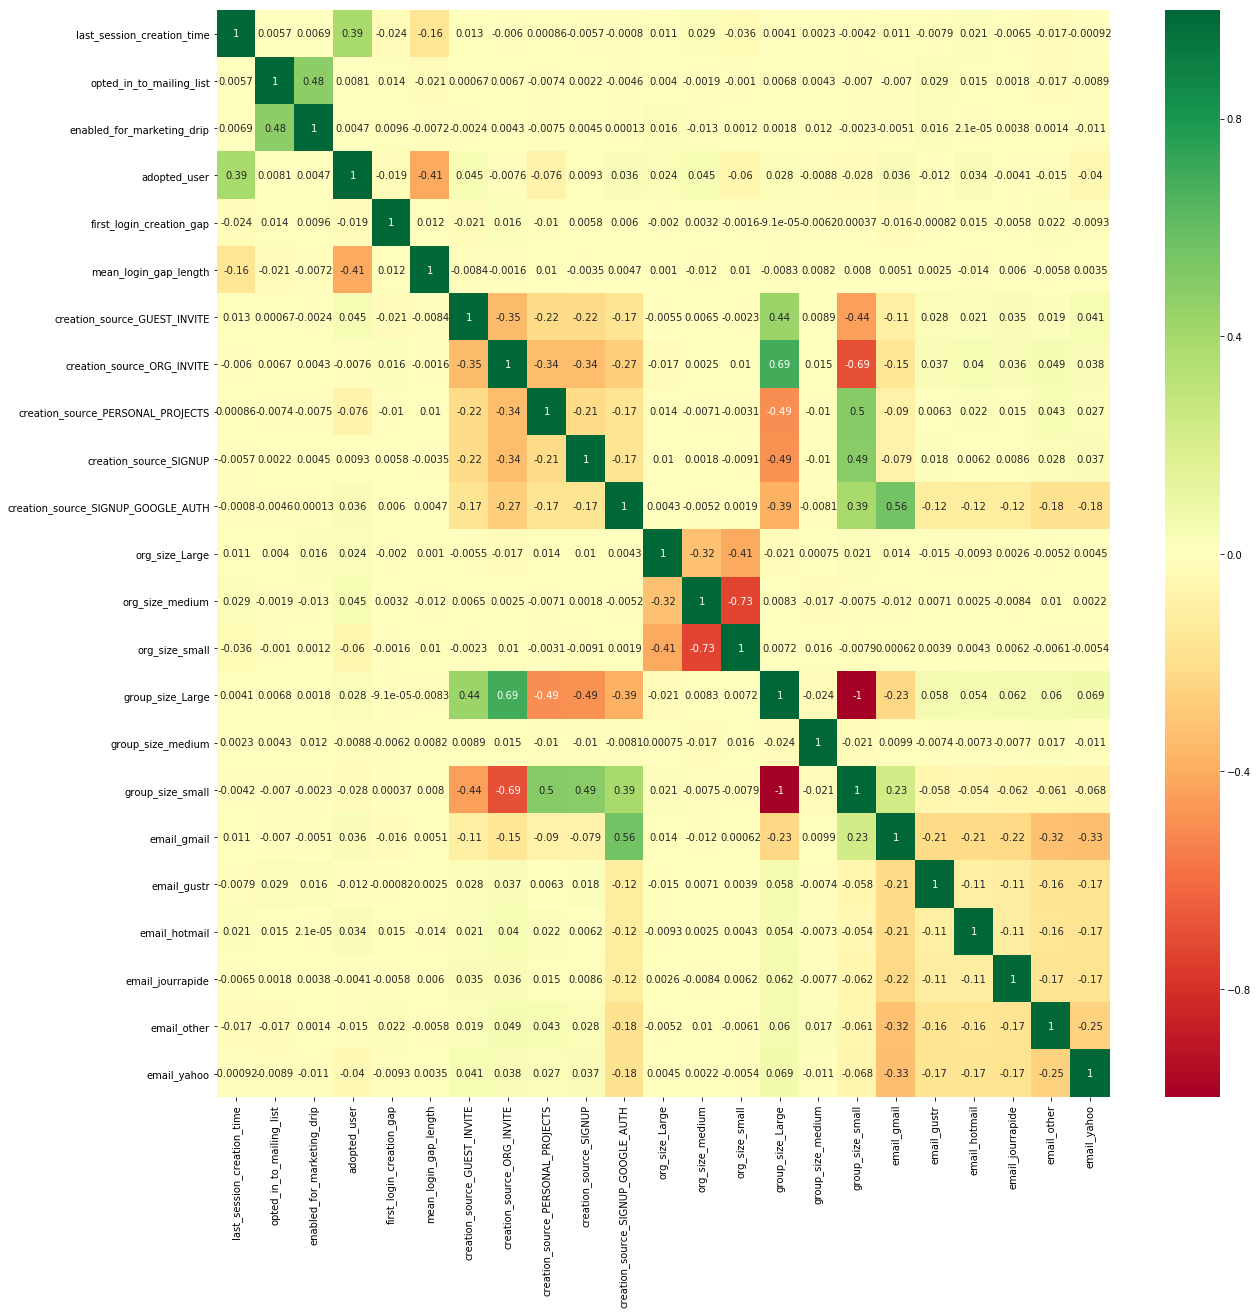

In [120]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


### Modleing I choose the random forest model because it is good for high dimensional data, also the tree based model is good for analyzing the feature importance

In [121]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [122]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

/Users/jialong/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [124]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[3402   42]
 [ 110  406]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      3444
         1.0       0.91      0.79      0.84       516

   micro avg       0.96      0.96      0.96      3960
   macro avg       0.94      0.89      0.91      3960
weighted avg       0.96      0.96      0.96      3960



=== All AUC Scores ===
[0.98021679 0.98653548 0.97483173 0.98377704 0.98550781 0.97364483
 0.98392127 0.97601262 0.97840472 0.97506015]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9797912452037032


In [133]:
feature_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

mean_login_gap_length                 0.533762
last_session_creation_time            0.348580
first_login_creation_gap              0.035305
enabled_for_marketing_drip            0.008656
opted_in_to_mailing_list              0.008292
org_size_small                        0.006540
org_size_medium                       0.005723
email_gmail                           0.005516
email_other                           0.005073
email_gustr                           0.005039
email_yahoo                           0.004949
email_hotmail                         0.004476
creation_source_GUEST_INVITE          0.004133
email_jourrapide                      0.004053
org_size_Large                        0.003960
creation_source_ORG_INVITE            0.003762
creation_source_PERSONAL_PROJECTS     0.003514
creation_source_SIGNUP                0.002526
creation_source_SIGNUP_GOOGLE_AUTH    0.002272
group_size_Large                      0.001955
group_size_small                      0.001907
group_size_me

In [134]:
type(feature_importance)

pandas.core.series.Series

In [135]:
fi = pd.DataFrame(feature_importance)

In [137]:
fi.columns = ['user']
new_fi = fi.reset_index()


In [138]:
new_fi.columns=['feature','score']


In [139]:
new_fi

,feature,score
0,mean_login_gap_length,0.533762
1,last_session_creation_time,0.348580
2,first_login_creation_gap,0.035305
3,enabled_for_marketing_drip,0.008656
4,opted_in_to_mailing_list,0.008292
5,org_size_small,0.006540
6,org_size_medium,0.005723
7,email_gmail,0.005516
8,email_other,0.005073
9,email_gustr,0.005039


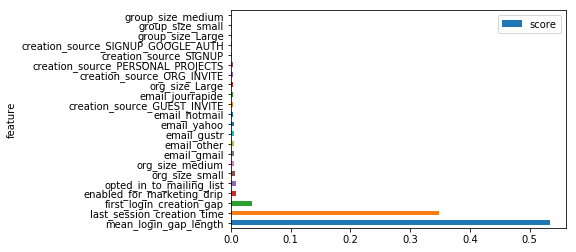

In [140]:
new_fi.plot(kind='barh',x='feature',y='score')


### In this situation, mean_login_gap_length,last_session_creation_time, first_login_creation_gap are important. That is very clear from the feature importance score. Another thing need to consider like email category, creation_source, org_size are also important factors, we need to combine the dummy variable together, although each feature in them are small, but if we combine them together, the importance score will also be very high. ( We can not sum the dummy variable into one variable, because they are highly correlated). I do not know how to explain the math theory behind this. However, it is clear: 1. mean_login_gap_length, 2.last_session_creation_time, 3. first_login_creation_gap,4.email category, 5.creation_source, 6.org_size. These features are important factors to adopted users. In my solution, there may be not accurte for one thing is about how I deal with the email address, since I moved all email domain name not in top email list like gmail, yahoo as 'other'. This may not be that good for modeling. Thanks and it is a very interesting project.